In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 1.
# Introduction to geospatial data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) Geographic and projected coordinate systems
# (2) Vector and raster data types: basic examples
# (3) Practice with vector data: geometry, attributes, spatial relations, spatial and attribute joins

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ASSIGNMENT:
# Plot a map showing the density of population of the towns in the province of Milano, in 2014. 
# You can use and extend the example from class.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [3]:
# Import libraries

import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


                               CLASSREF BELFIORE COD_ISTATN  \
0  0570159f-0e0f-4edd-824c-23388d03a009     I276   03018144   
1  560529b7-af1e-4dee-a47b-8dd8541bc6b6     D367   03015101   
2  f3df939e-5fb6-4ccb-b040-bcfc0ee5b550     E608   03018082   
3  1274f1c9-79a2-40a4-8e4b-9e18bb967257     A849   03108009   
4  2eb51e8c-a2ce-418d-ba5e-ec32d2b3f219     L778   03017196   

                NOME_COM  COD_PRO               NOME_PRO SIG_PRO COD_CMO  \
0  SANT`ANGELO LOMELLINA       18                  PAVIA      PV    None   
1                DRESANO       15                 MILANO      MI    None   
2                  LIRIO       18                  PAVIA      PV    None   
3               BIASSONO      108  MONZA E DELLA BRIANZA      MB    None   
4          VEROLAVECCHIA       17                BRESCIA      BS    None   

  NOME_CMO  COD_ASL  ... ANNO   ISTAT LEGGE_ISTI  ATS_COD  \
0     None       12  ...    0   18144       None   030328   
1     None       10  ...    0   15101     

<AxesSubplot:>

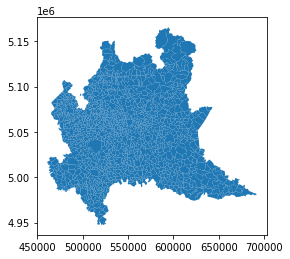

In [4]:
# Set the filepath and load the shapefile as a geopandas dataframe; explore

shapefile = './REGIONE_LOMBARDIA_2020/Comuni_2020_poligonali.shp'

comuni = gpd.GeoDataFrame.from_file(shapefile)
print(comuni.head())
comuni.plot()

In [5]:
# Now let's add new information in our "comuni" dataframe:
#  we will merge population data from an external table

# Then, let's join it with the geodatabase "comuni"
#  https://geopandas.org/mergingdata.html#

# First, import a data table into a pandas df

tab_pop = pd.read_csv('./Lombardia_Pop2011_2014.csv',sep=',',encoding= 'unicode_escape')
tab_pop

,Codice,Comune,Cod_prov,Provincia,Pop2011,Pop2014
0,3017064,CORZANO,17,BRESCIA,1358.0,1427.0
1,3017167,RUDIANO,17,BRESCIA,5861.0,5822.0
2,3017201,VILLANUOVA SUL CLISI,17,BRESCIA,5855.0,5778.0
3,3017084,IRMA,17,BRESCIA,152.0,128.0
4,3017102,MANERBA DEL GARDA,17,BRESCIA,4985.0,5290.0
...,...,...,...,...,...,...
1526,3012043,CASTELLO CABIAGLIO,12,VARESE,548.0,582.0
1527,3012062,CUVEGLIO,12,VARESE,3443.0,3428.0
1528,3012037,CASALZUIGNO,12,VARESE,1360.0,1336.0
1529,3012038,CASCIAGO,12,VARESE,3916.0,3841.0


                               CLASSREF BELFIORE  COD_ISTATN  \
0  0570159f-0e0f-4edd-824c-23388d03a009     I276     3018144   
1  560529b7-af1e-4dee-a47b-8dd8541bc6b6     D367     3015101   
2  f3df939e-5fb6-4ccb-b040-bcfc0ee5b550     E608     3018082   
3  1274f1c9-79a2-40a4-8e4b-9e18bb967257     A849     3108009   
4  2eb51e8c-a2ce-418d-ba5e-ec32d2b3f219     L778     3017196   

                NOME_COM  COD_PRO               NOME_PRO SIG_PRO COD_CMO  \
0  SANT`ANGELO LOMELLINA       18                  PAVIA      PV    None   
1                DRESANO       15                 MILANO      MI    None   
2                  LIRIO       18                  PAVIA      PV    None   
3               BIASSONO      108  MONZA E DELLA BRIANZA      MB    None   
4          VEROLAVECCHIA       17                BRESCIA      BS    None   

  NOME_CMO  COD_ASL  ... CMETR_COD                       CMETR_DEC  \
0     None       12  ...      None                            None   
1     None       1

<AxesSubplot:>

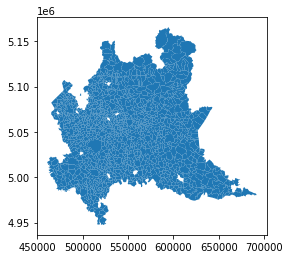

In [6]:
# In order to make a join, we need a common field: let that be the town code. 
# Let's rename it in the table so that the attribute names match.

tab_pop.rename(columns={'Codice':'COD_ISTATN'}, inplace=True)

# Now make the join

tab_pop.COD_ISTATN=tab_pop.COD_ISTATN.astype(int)
comuni.COD_ISTATN=comuni.COD_ISTATN.astype(int)
comuni = comuni.merge(tab_pop, on='COD_ISTATN')
print(comuni.head())
comuni.plot()

# per discrepanze ad esempio nei nomi risultano dei buchi nella mappa (in questo caso è tutta la lombardia)

<AxesSubplot:>

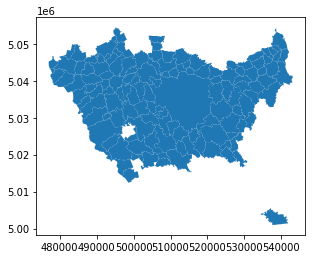

In [7]:
# In "comuni" we already have all the necessary information: population, geometry, province.
# Let's extract the province of Milano and calculate density

milano = comuni[comuni.COD_PRO==15]  # ci focalizziamo sulla sola provincia di milano
#milano = comuni[comuni.NOME_PRO=='MILANO']
milano.plot()

In [8]:
# Make calculations

milano = milano.assign(area=milano['geometry'].area/1e6)
milano = milano.assign(pop_dens=milano['Pop2014']/(milano['area']))

<AxesSubplot:>

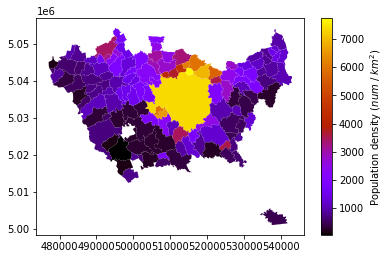

In [9]:
# Plot

milano.plot(column=milano['pop_dens'], cmap='gnuplot', legend=True,\
          legend_kwds={'label': 'Population density ($num$ $/$ $km^2$)'})

# si vede che la maggiore densità è nella milano interland